In [1]:
cd ..

/Users/yanndubois/Desktop/GitHub/alpaca_eval


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from alpaca_eval import utils, metrics, annotators, constants, analyze, plotting, main

with utils.silent():
    analyzer = analyze.Analyzer()

/Users/yanndubois/opt/anaconda3/envs/alpaca_eval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Comparing annotators

First, let us compare the properties of different annotators

In [4]:
# precomputing leaderboard
for annotators_config in constants.MINIMAL_EVALUATORS:
    with utils.silent():
        _=main.analyze_evaluators(annotators_config=annotators_config, is_save_leaderboard=True, is_return_instead_of_print=True)

In [5]:
evaluator_leaderboard,_ = main.analyze_evaluators(annotators_config=None, 
                                                  is_return_instead_of_print=True)
evaluator_leaderboard = evaluator_leaderboard.loc[constants.MINIMAL_EVALUATORS,:]

## Time and price and quality

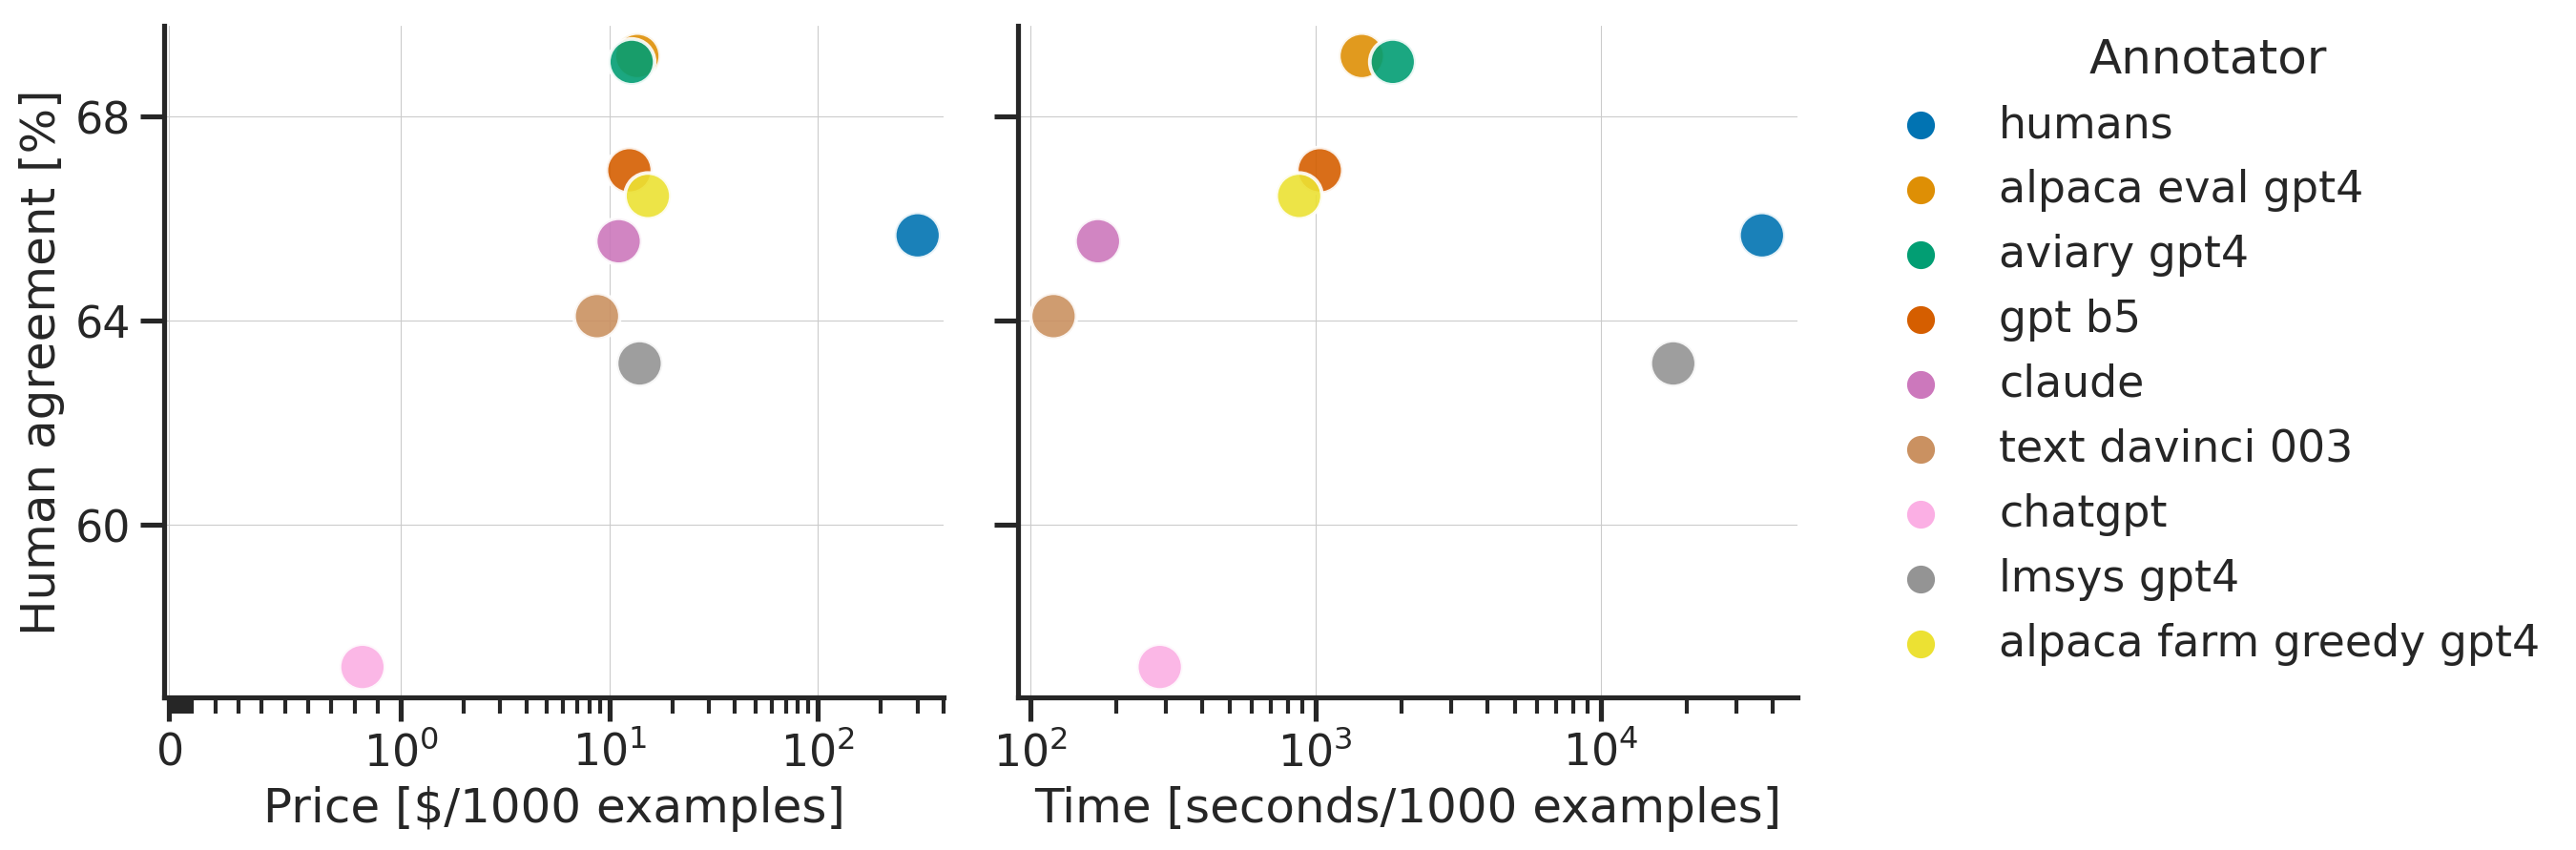

In [6]:
g=plotting.plot_quality_vs_price_and_time(evaluator_leaderboard)
plotting.save_fig(g, "figures/plot_quality_vs_price_and_time.png")

## Price and quality

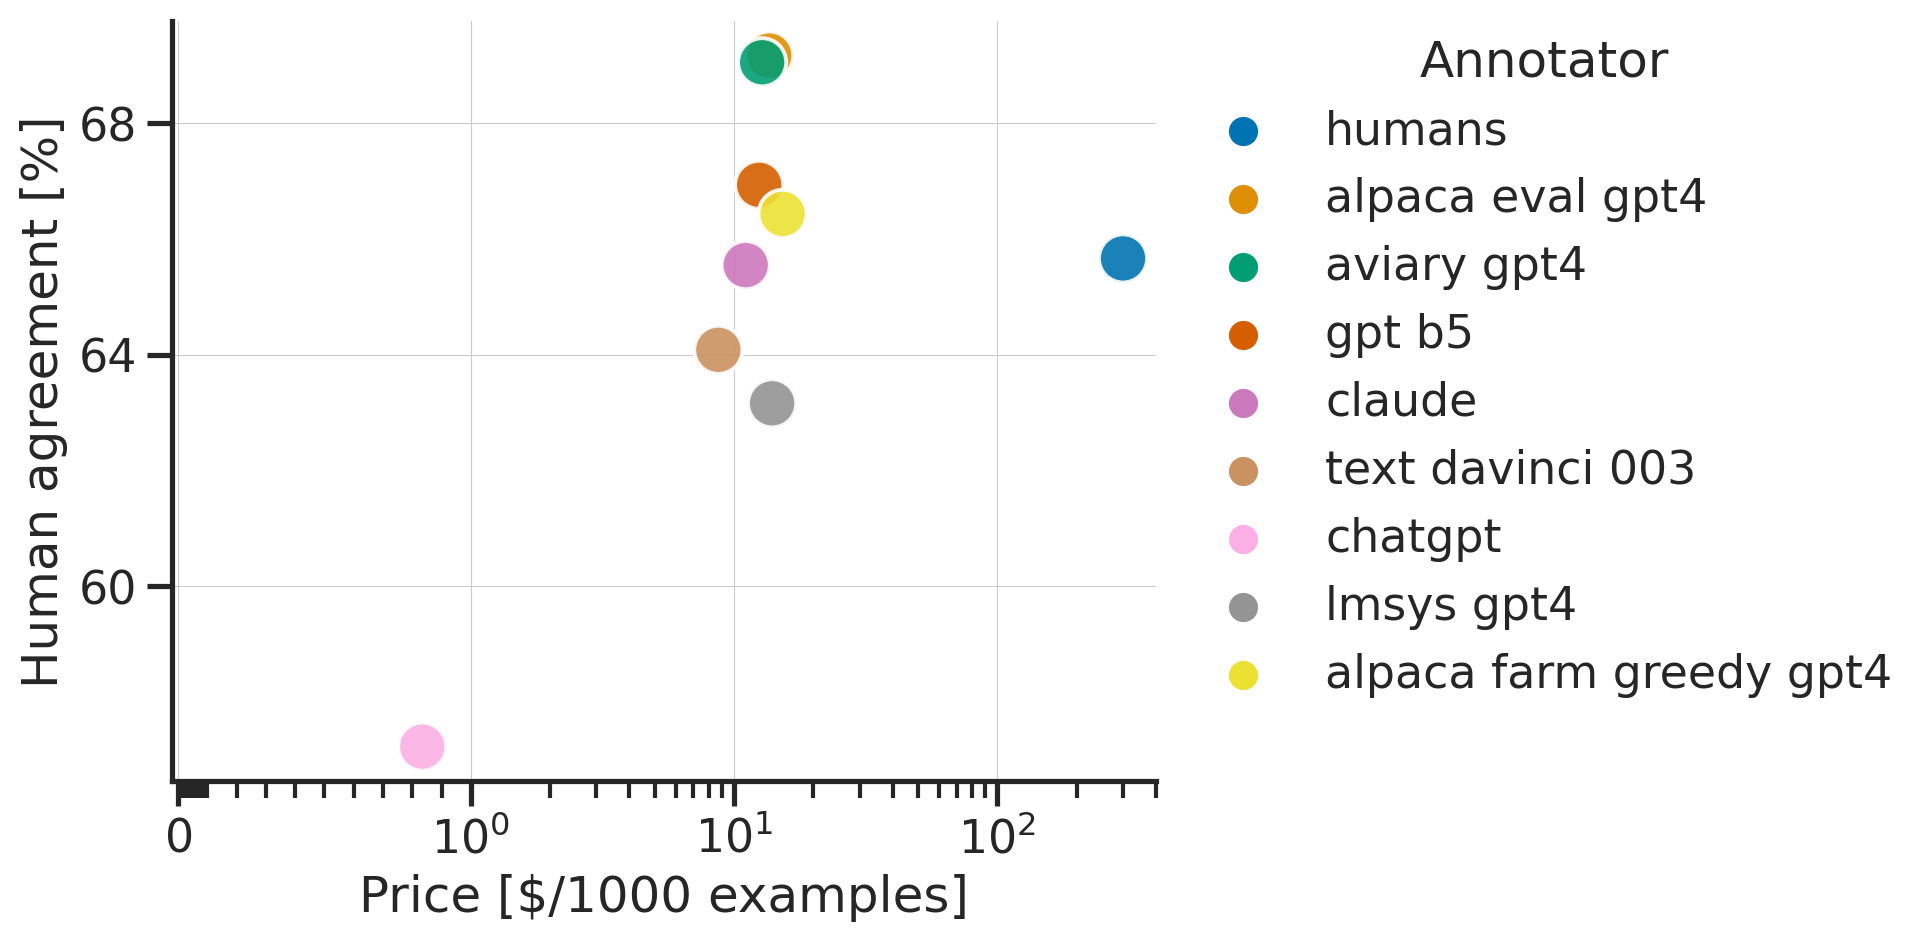

In [7]:
g=plotting.plot_quality_vs_price(evaluator_leaderboard)

## Time and quality

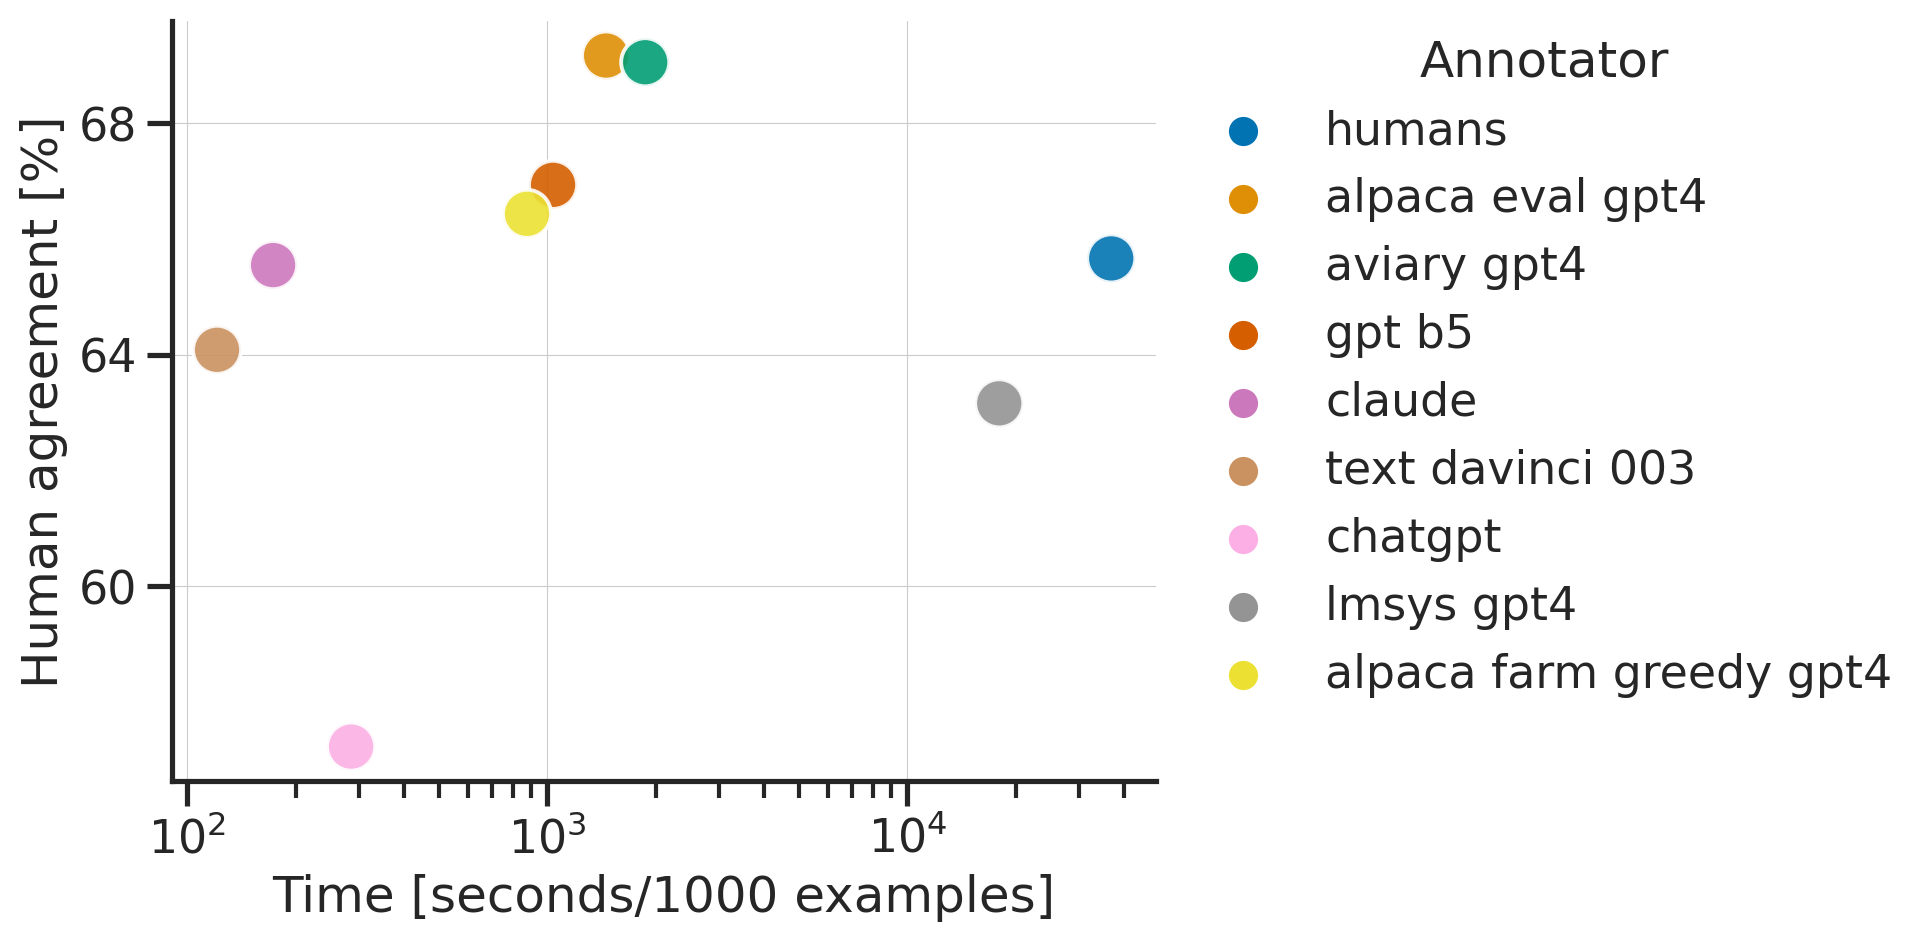

In [8]:
g=plotting.plot_quality_vs_time(evaluator_leaderboard)

## Bias vs variance

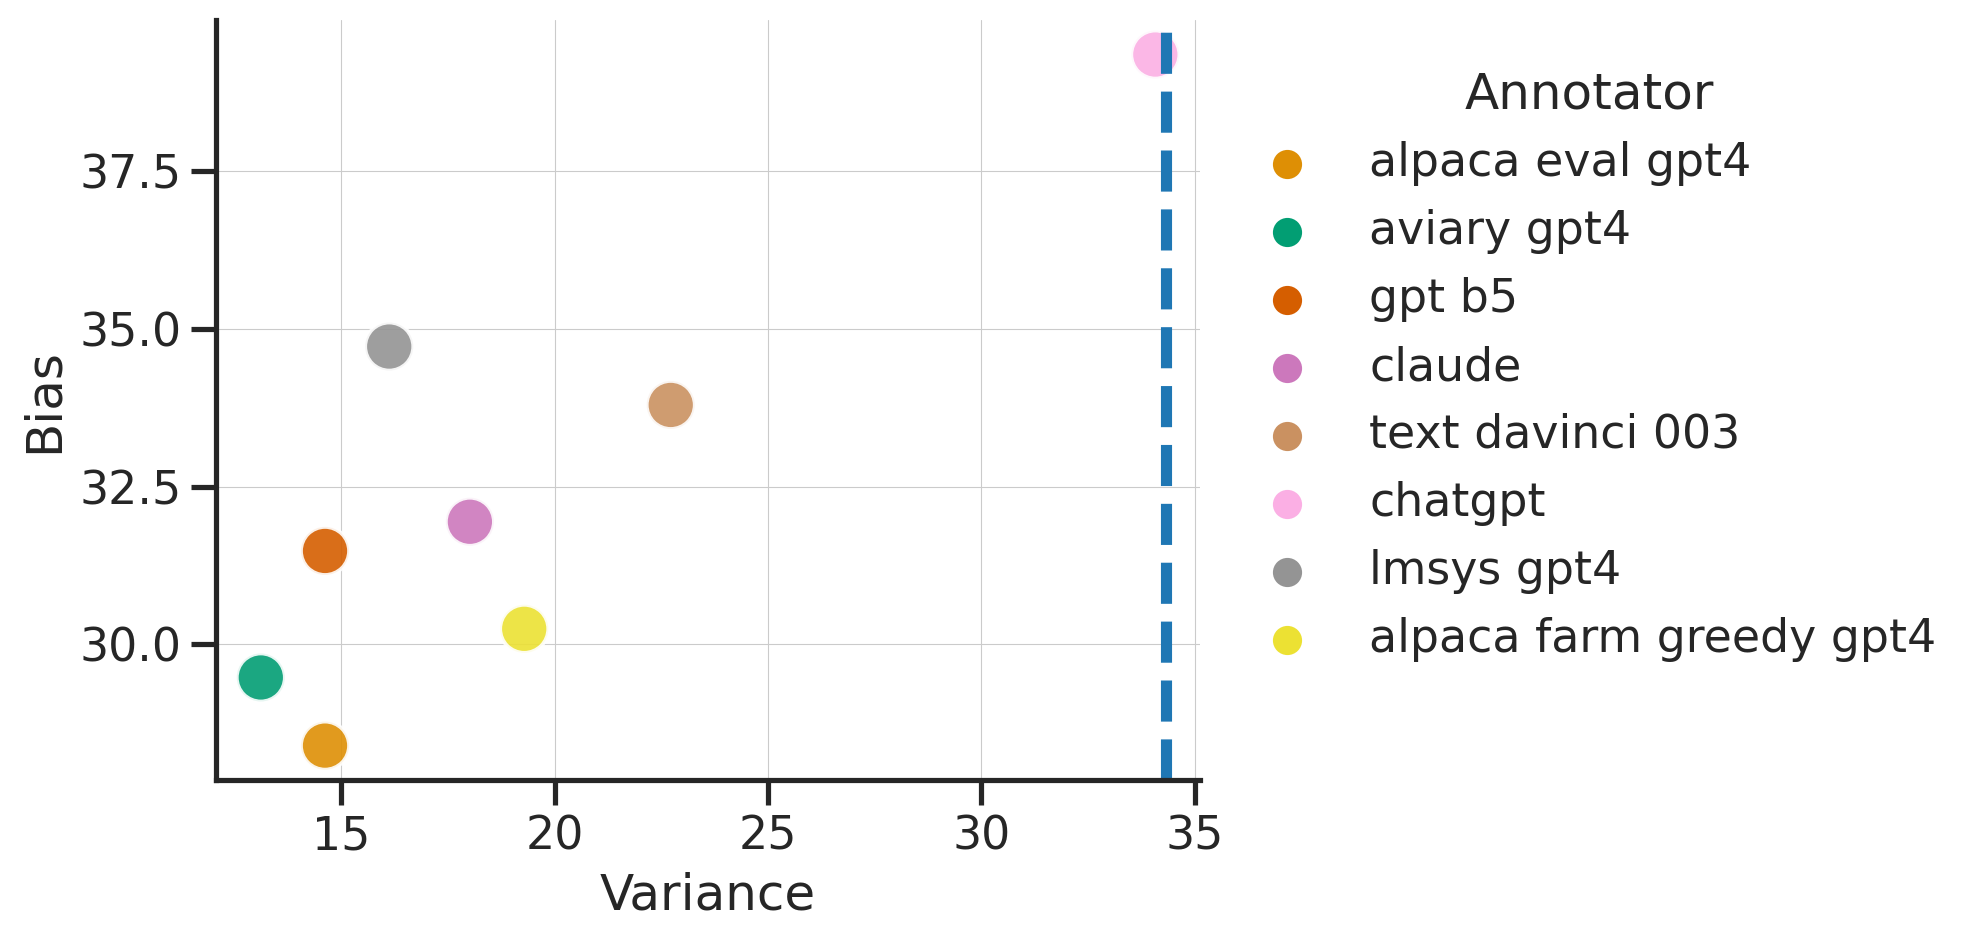

In [9]:
g=plotting.plot_bias_vs_variance(evaluator_leaderboard)

## All properties

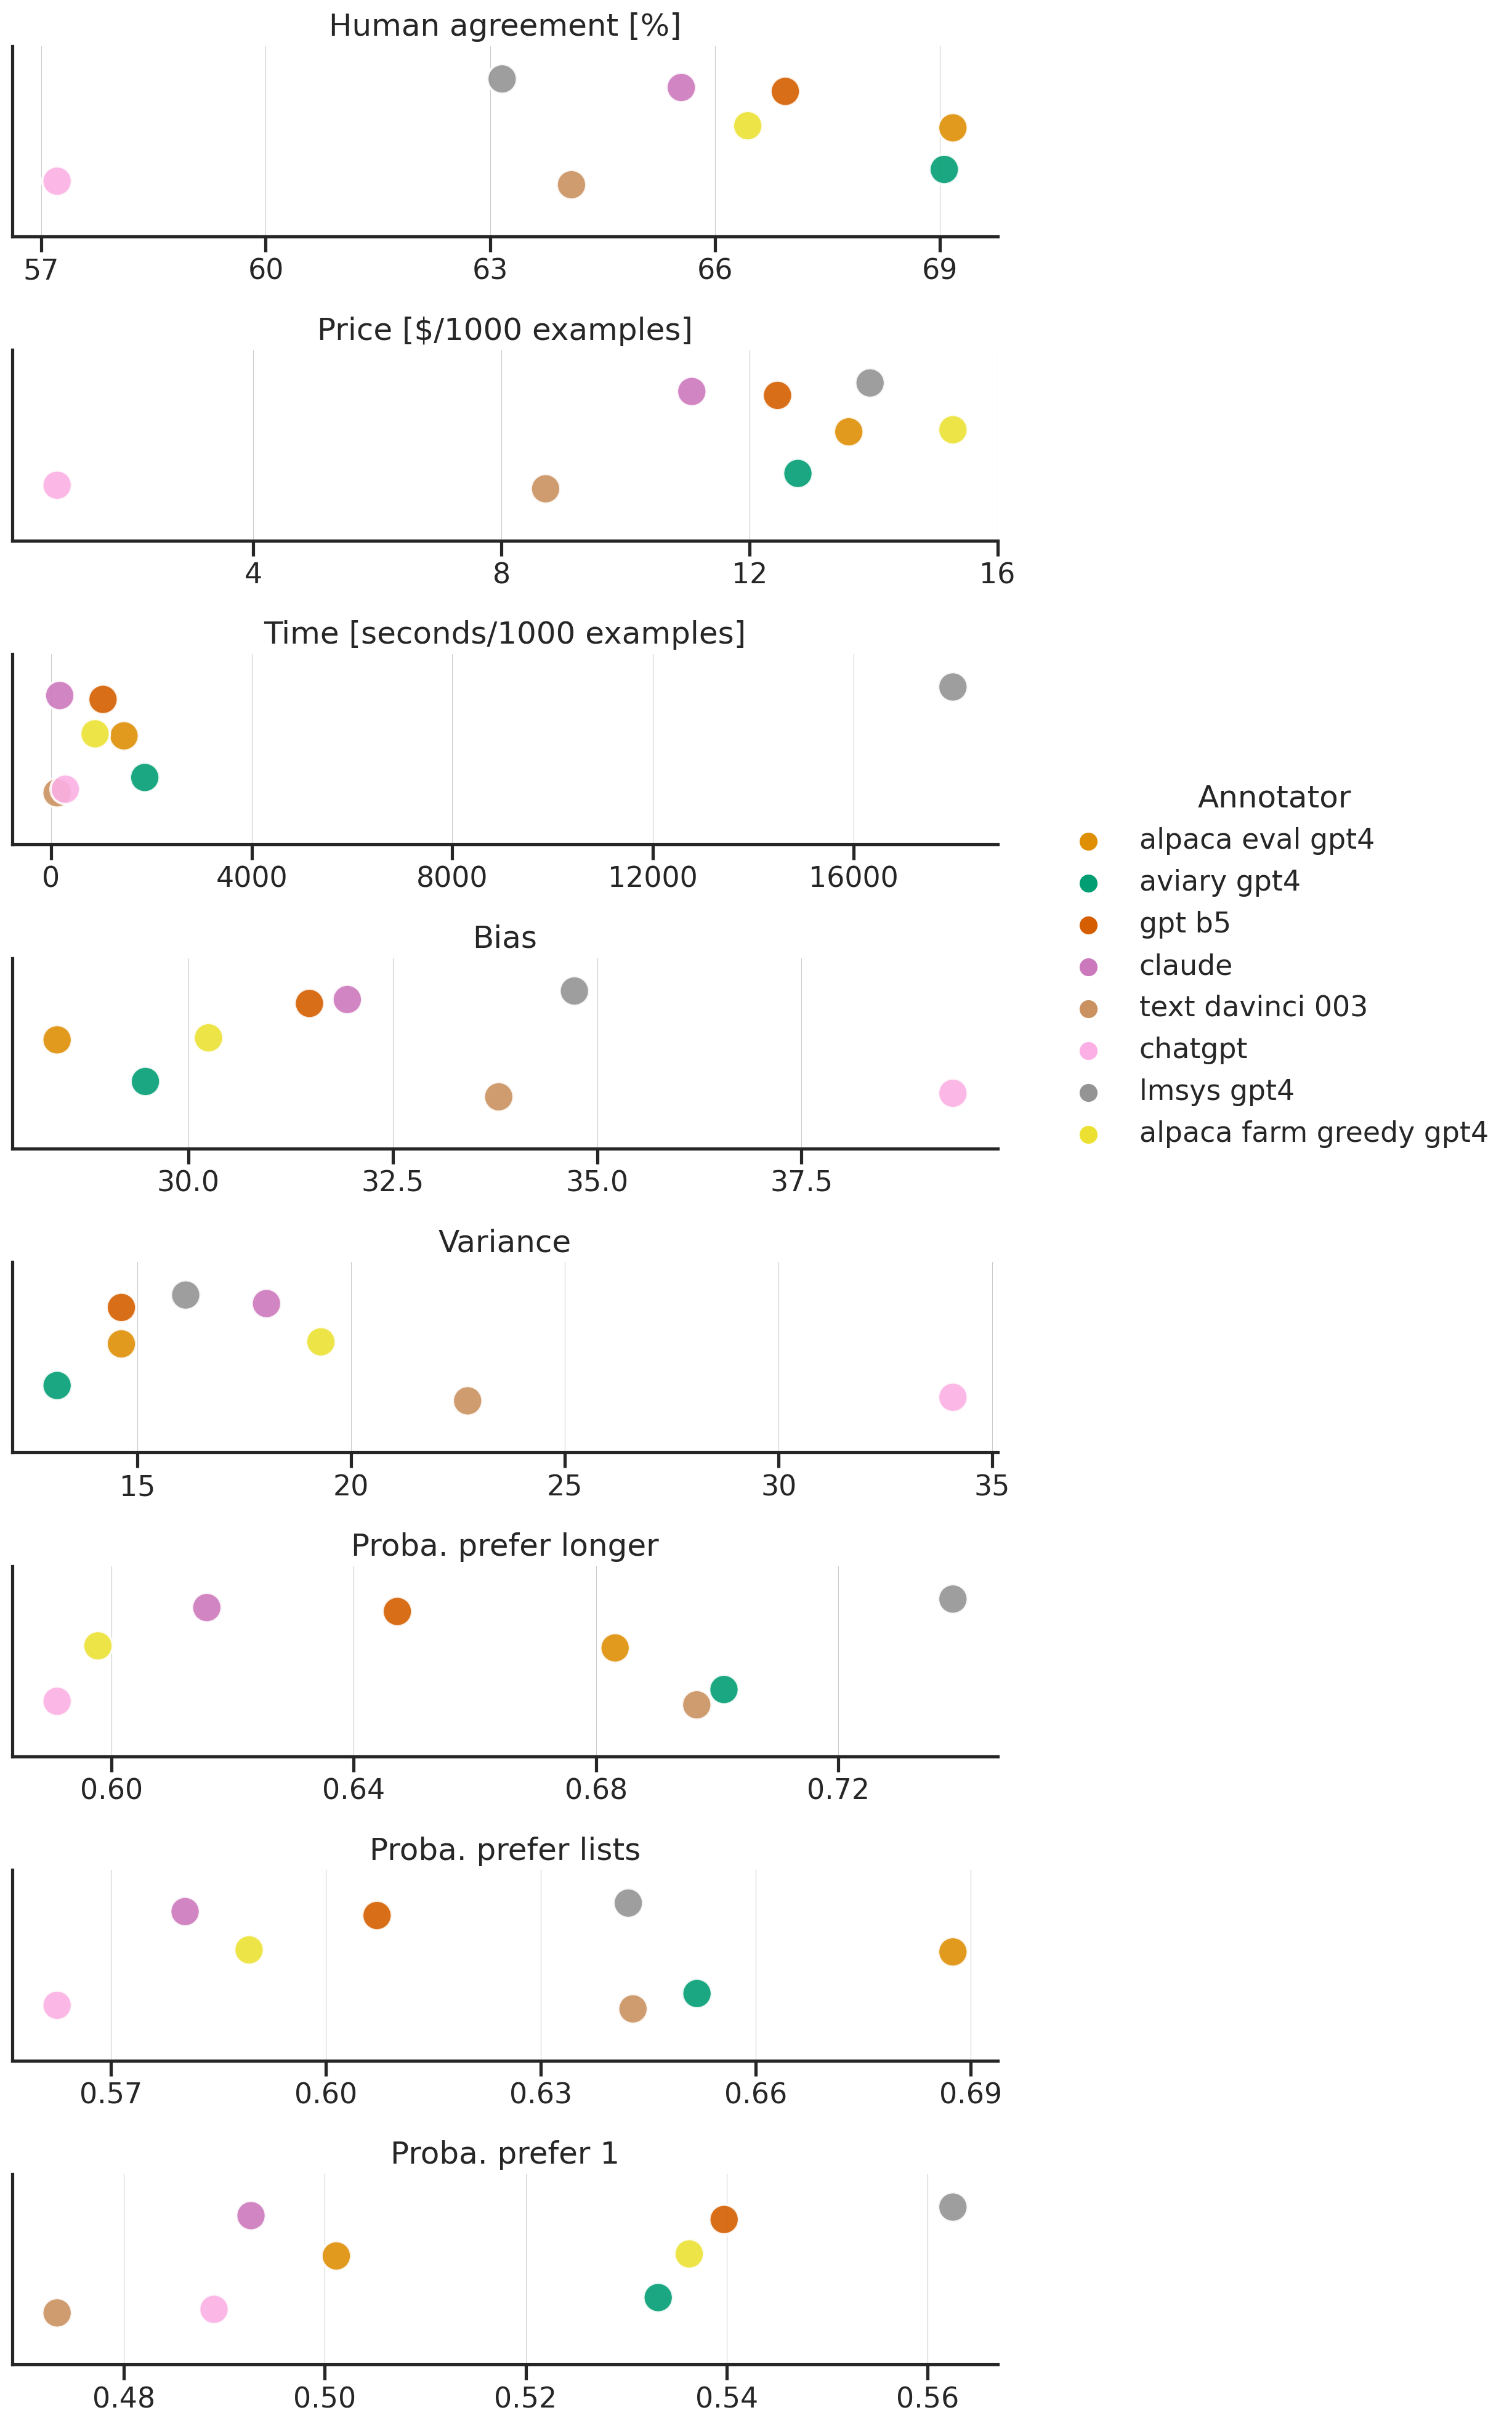

In [10]:
g=plotting.plot_all_properties(evaluator_leaderboard, 
                               is_human_at_top=True, 
                               annotators_to_rm=["humans"],
                              properties_to_rm=["# parsed","mode"])

# Analyzing an annotator

Once we decided on which automatic annotator to use, a natural question is whether making a leaderboard using our automatic annotator gives similar results as a leaderboard from humans. As part of AlpacaEval, we provide human annotations of outputs from 22 methods annotated on our eval set => 22*805 = ~18K annotations. As a result we can test the correlation of any automatic annotation with human annotations.

In [5]:
is_compute_annotations = False # very expensive (18K annotations)
if is_compute_annotations:
    df_annotations = analyze.get_annotations(analyzer, annotators.PairwiseAnnotator,  annotators_config="alpaca_eval_gpt4")

    auto_leaderboard = df_annotations.groupby("generator")["preference"].apply(metrics.pairwise_to_winrate).reset_index().pivot(columns="level_1", index='generator', values='preference')
    auto_leaderboard = auto_leaderboard.sort_values(by="win_rate", ascending=False)

    human_leaderboard = analyzer.df_gold_annotations.groupby("generator")["preference"].apply(metrics.pairwise_to_winrate).reset_index().pivot(columns="level_1", index='generator', values='preference')
    human_leaderboard = human_leaderboard.sort_values(by="win_rate", ascending=False)

    g = plotting.plot_winrate_correlations(human_leaderboard, auto_leaderboard)
    plotting.save_fig(g, "figures/plot_winrate_correlations_alpaca_eval.png")
